In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
from scipy.optimize import brentq
%matplotlib inline

import scipy.integrate as integrate
from scipy.stats import expon #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon
from scipy.stats import pareto #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html#scipy.stats.pareto
from scipy.stats import weibull_min #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html#scipy.stats.weibull_min

In [2]:
import src.Class_FiscRule as CFR

In [3]:
#save_results_to = '/Users/guillaumesublet/Dropbox/Economics/Research/RulewDisc/Fiscal_rules_theory/Examples/output/'

### Fiscal rule for an economic union $\rho = 1$

Average deficit $\frac{g - T}{Y}$ for the Euro area pre 1998 is 4.91% over 1995 (7.33%), 1996 (4.36%) and 1997 (3.05%). (OECD data)

Average revenue over GDP $\frac{T}{Y}$ for the Euro area 45.46% over 2002-2019 period.

Target is the average deficit $\frac{g - T}{T} = \frac{g - T}{Y} \frac{Y}{T} = \frac{0.0491}{0.4546} = 0.1080$.

Normalize $T = 1$ and target an average spending $g$ to $1.1080$

In [4]:
omega = 0.98

theta_min = 1
theta_max = 4

lambda_exp = 3
#gamma = lambda_exp * theta_min + 1 # so that the mean of the Pareto and the exponential distributions are the same
gamma = 4

# Environments
    # Low present bias
beta = 0.8
FR_exp = CFR.FiscRule(omega = omega, dist = 'exponential', lambda_exp = lambda_exp, beta = beta, rho = 1, grid_min = theta_min, grid_max = theta_max)

FR_mixture = CFR.FiscRule(omega = omega, dist = 'mixture', gamma = gamma, lambda_exp = lambda_exp, a_mixture  = 0.375, beta = beta, rho = 1, grid_min = theta_min, grid_max = theta_max)
FR_truncmixture = CFR.FiscRule(omega = omega, dist = 'trunc_mixture', gamma = gamma, lambda_exp = lambda_exp, a_mixture  = 0.375, beta = beta, rho = 1, grid_min = theta_min, grid_max = theta_max, theta_bar = 4.1)

FR_cal = CFR.FiscRule(omega = omega, dist = 'pareto',       gamma = gamma, beta = beta, rho = 1, grid_min = theta_min, grid_max = theta_max)
    # Intermediate present bias
beta_h = 0.7
#FR_high = CFR.FiscRule(beta = beta_h, rho = 1, grid_min = theta_min, grid_max = theta_max, lambda_exp = 3, dist = 'exponential')
FR_1 = CFR.FiscRule(omega = omega, dist = 'pareto',       gamma = gamma, beta = beta_h, rho = 1, grid_min = theta_min, grid_max = theta_max)
FR_2 = CFR.FiscRule(omega = omega, dist = 'trunc_pareto', gamma = gamma, beta = beta_h, rho = 1, grid_min = theta_min, grid_max = theta_max, theta_bar = 4.1)    

In [5]:
print(FR_exp.mean_deficit())
print(FR_cal.mean_deficit())
print(FR_mixture.mean_deficit())
print(FR_truncmixture.mean_deficit())

0.10704419177152968
0.10396889986347624
0.10473980822390638
0.10448403257845618


In [6]:
print(FR_exp.discretionary(FR_exp.theta_p(FR_exp.theta_bar)))

1.1135754671957063


In [7]:
# check that the mean is the same
print(FR_exp.mean_fiscal_need())
print(FR_exp.grid_min + 1/ lambda_exp)
print(FR_1.mean_fiscal_need())
print(gamma/(gamma - 1))
print(FR_mixture.mean_fiscal_need())
print(FR_truncmixture.mean_fiscal_need())

1.3333333333333335
1.3333333333333333
1.3333333333333333
1.3333333333333333
1.327251852657103
1.3242178305734615


In [8]:
# determine thresholds
theta_p = FR_exp.theta_p(FR_exp.theta_bar)
print(theta_p)
theta_e = FR_mixture.theta_n()
print(theta_e)
theta_e_tmix = FR_truncmixture.theta_n()
print(theta_e_tmix)
theta_xp_tmix = FR_truncmixture.theta_xp(FR_truncmixture.theta_bar)
print(theta_xp_tmix)
theta_x_1 = FR_1.theta_x()
print(theta_x_1)
theta_x_2 = FR_2.theta_x()
print(theta_x_2)
theta_xp_2 = FR_2.theta_xp(FR_2.theta_bar)
print(theta_xp_2)

1.3333333333335056
1.3333333333333348
1.3240556624326694
2.1953986790101996
1.5743742821832565
1.6096034928789196
2.1995274156320783


In [9]:
# Allocations
    # Exponential
discretionary_exp = FR_exp.discretionary_alloc()
state_contingent_exp = FR_exp.state_contingent_alloc()
costly_disc_exp = FR_exp.costly_disc_alloc()
discretionary_cap = FR_exp.disc_cap_alloc(np.inf)

    # F truncated weibull
discretionary_wei = FR_truncmixture.discretionary_alloc()
state_contingent_wei = FR_truncmixture.state_contingent_alloc()
costly_disc = FR_truncmixture.costly_disc_alloc()
disc_costlydisc_prohib = FR_truncmixture.disc_costlydisc_prohib() #FR_wei.disc_costlydisc_prohib()

    # F Weibull
discretionary_wei_n = FR_mixture.discretionary_alloc()
state_contingent_wei_n = FR_mixture.state_contingent_alloc()
costly_disc_n = FR_mixture.costly_disc_alloc()
disc_costlydisc_n = FR_mixture.disc_costlydisc()

    # Pareto
discretionary_1 = FR_1.discretionary_alloc()
state_contingent_1 = FR_1.state_contingent_alloc()
costly_disc_alloc_1 = FR_1.costly_disc_alloc()
exempt_costlydisc = FR_1.exempt_costlydisc()

    # Truncated Pareto
discretionary_2 = FR_2.discretionary_alloc()
state_contingent_2 = FR_2.state_contingent_alloc()
costly_disc_alloc_2 = FR_2.costly_disc_alloc()
exempt_costlydisc_prohib = FR_2.exempt_costlydisc_prohib()

In [10]:
# Thresholds for plots
theta_p = FR_exp.theta_p(FR_exp.theta_bar)
theta_e = FR_truncmixture.theta_n()
theta_xp_w = FR_truncmixture.theta_xp(FR_truncmixture.theta_bar)
theta_e_n = FR_mixture.theta_n()
theta_x_1 = FR_1.theta_x()
theta_x_2 = FR_2.theta_x()
theta_xp_2 = FR_2.theta_xp(FR_2.theta_bar)

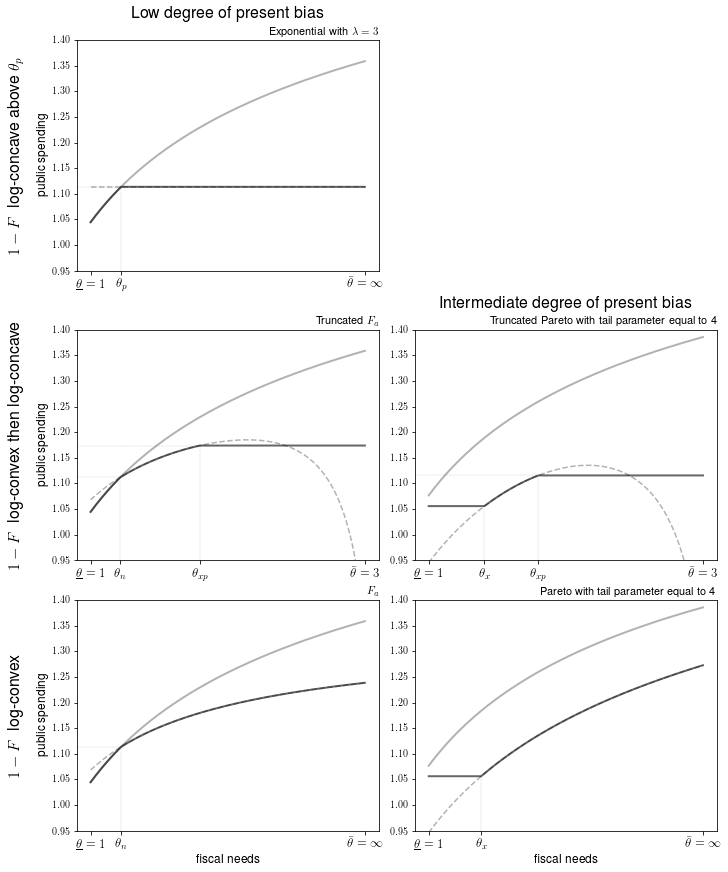

In [11]:
# Plot
fig, axarr = plt.subplot_mosaic([['a)','.'],['b)', 'e)'],['c)', 'd)']], constrained_layout=True, figsize=(10,12))#, sharex=True, sharey=True)



axarr['a)'].plot(FR_exp.theta_grid, discretionary_exp, lw=2, alpha=0.6, linestyle='-',label='discretionary', color='gray')        
#axarr['a)'].plot(FR_exp.theta_grid, state_contingent_exp, lw=2, alpha=0.6, label='$\\theta$-contingent rule', linestyle='--', color='gray')
axarr['a)'].plot(FR_exp.theta_grid, costly_disc_exp, lw=1.5, alpha=0.6, linestyle='--', color='gray')
axarr['a)'].plot(FR_exp.theta_grid, discretionary_cap, lw=2, alpha=0.6, color='k', label='discretion and cap')

axarr['a)'].set_title('Exponential with $\\lambda = 3$', loc='right', fontsize=11)
axarr['a)'].set(xticks=[FR_exp.grid_min, theta_p, theta_max])
axarr['a)'].set_xticklabels([r'$\underline{\theta}=1$', '$\\theta_p$', r'$\bar{\theta}=\infty$'], fontsize=13)


axarr['b)'].plot(FR_truncmixture.theta_grid, discretionary_wei, lw=2, alpha=0.6, linestyle='-', color='gray')
#axarr['b)'].plot(FR_wei.theta_grid, state_contingent_wei, lw=2, alpha=0.6, linestyle='--', color='gray')
axarr['b)'].plot(FR_truncmixture.theta_grid, costly_disc, lw=1.5, alpha=0.6, linestyle='--', color='gray')
axarr['b)'].plot(FR_truncmixture.theta_grid, disc_costlydisc_prohib, lw=2, alpha=0.6, label='discretion, costly discretion and cap', linestyle='-', color='k')

axarr['b)'].set_title('Truncated $F_a$', loc='right', fontsize=11)
axarr['b)'].set(xticks=[FR_truncmixture.grid_min, theta_e, theta_xp_w, theta_max])
axarr['b)'].set_xticklabels([r'$\underline{\theta}=1$', '$\\theta_n$', '$\\theta_{xp}$', r'$\bar{\theta}=3$'], fontsize=13)

axarr['c)'].plot(FR_mixture.theta_grid, discretionary_wei_n, lw=2, alpha=0.6, linestyle='-',label='discretionary', color='gray')
#axarr['c)'].plot(FR_wei_n.theta_grid, state_contingent_wei_n, lw=2, alpha=0.6, linestyle='--', color='gray')
axarr['c)'].plot(FR_mixture.theta_grid, costly_disc_n, lw=1.5, alpha=0.6, linestyle='--', color='gray')
axarr['c)'].plot(FR_mixture.theta_grid, disc_costlydisc_n, lw=2, alpha=0.6, label='discretion and costly discretion', linestyle='-', color='k')

axarr['c)'].set_title('$F_a$', loc='right', fontsize=11)
axarr['c)'].set(xticks=[FR_mixture.grid_min, theta_e_n, theta_max])
axarr['c)'].set_xticklabels([r'$\underline{\theta}=1$', '$\\theta_n$', r'$\bar{\theta}=\infty$'], fontsize=13)

axarr['d)'].plot(FR_1.theta_grid, discretionary_1, lw=2, alpha=0.6, label='discretionary', linestyle='-', color='gray')
#axarr['d)'].plot(FR_1.theta_grid, state_contingent_1, lw=2, alpha=0.6, label='$\\theta$-contingent rule', linestyle='--', color='gray')
axarr['d)'].plot(FR_1.theta_grid, costly_disc_alloc_1, lw=1.5, alpha=0.6,label='costly discretion', linestyle='--', color='gray')
axarr['d)'].plot(FR_1.theta_grid, exempt_costlydisc, lw=2, alpha=0.6, label='exemption and costly discretion', color='k')
axarr['d)'].set(xticks=[FR_1.grid_min, theta_x_1, theta_max]) #yticks=[]
axarr['d)'].set_xticklabels([r'$\underline{\theta}=1$', '$\\theta_x$', r'$\bar{\theta}=\infty$'], fontsize=13)

axarr['d)'].set_title('Pareto with tail parameter equal to 4', loc='right', fontsize=11)

axarr['e)'].plot(FR_2.theta_grid, discretionary_2, lw=2, alpha=0.6, linestyle='-', color='gray')
#axarr['e)'].plot(FR_2.theta_grid, state_contingent_2, lw=2, alpha=0.6, linestyle='--', color='gray')
axarr['e)'].plot(FR_2.theta_grid, costly_disc_alloc_2, lw=1.5, alpha=0.6, linestyle='--', color='gray')
axarr['e)'].plot(FR_2.theta_grid, exempt_costlydisc_prohib, lw=2, alpha=0.6, label='exemption, costly discretion and cap', color='k')
axarr['e)'].set(xticks=[FR_2.grid_min, theta_x_2, theta_xp_2, theta_max])
axarr['e)'].set_xticklabels([r'$\underline{\theta}=1$', '$\\theta_x$', '$\\theta_{xp}$', r'$\bar{\theta}=3$'], fontsize=13)

axarr['e)'].set_title('Truncated Pareto with tail parameter equal to 4', loc='right', fontsize=11)

axarr['c)'].set_xlabel('fiscal needs', fontsize=12)
axarr['d)'].set_xlabel('fiscal needs', fontsize=12)
axarr['a)'].set_ylabel('public spending', fontsize=12)
axarr['b)'].set_ylabel('public spending', fontsize=12)#, rotation=0)
axarr['c)'].set_ylabel('public spending', fontsize=12)#, rotation=0)
#axarr['d)'].set_ylabel('$g \ $ ', fontsize=14, rotation=0)
#axarr['e)'].set_ylabel('$g \ $ ', fontsize=14, rotation=0)

ymin=0.95
ymax=1.4
axarr['a)'].set_ylim([ymin,ymax])
axarr['b)'].set_ylim([ymin,ymax])
axarr['c)'].set_ylim([ymin,ymax])
axarr['d)'].set_ylim([ymin,ymax])
axarr['e)'].set_ylim([ymin,ymax])

pad = 10
axarr['a)'].annotate('Low degree of present bias', xy=(0.5, 1.05), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points', 
                fontsize=16, ha='center', va='baseline')
axarr['e)'].annotate('Intermediate degree of present bias', xy=(0.5, 1.05), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                fontsize=16, ha='center', va='baseline')

axarr['a)'].annotate('$1-F \ $ log-concave above $\\theta_p$', xy=(0, 0.5), xytext=(-axarr['a)'].yaxis.labelpad - pad, 0),
                xycoords=axarr['a)'].yaxis.label, textcoords='offset points',
                fontsize=16, ha='right', va='center', rotation=90)

axarr['b)'].annotate('$1-F \ $ log-convex then log-concave', xy=(0, 0.5), xytext=(-axarr['b)'].yaxis.labelpad - pad, 0),
                xycoords=axarr['b)'].yaxis.label, textcoords='offset points',
                fontsize=16, ha='right', va='center', rotation=90)

axarr['c)'].annotate('$1-F \ $ log-convex', xy=(0, 0.5), xytext=(-axarr['c)'].yaxis.labelpad - pad, 0),
                xycoords=axarr['c)'].yaxis.label, textcoords='offset points',
                fontsize=16, ha='right', va='center', rotation=90)

axarr['a)'].axvline(x=theta_p, ymax=0.36, lw=0.3, alpha=0.6, color='k', linestyle=':')
axarr['a)'].axhline(y=FR_exp.discretionary(theta_p), xmax=0.16, lw=0.3, alpha=0.6, color='k', linestyle=':')
axarr['b)'].axvline(x=theta_e, ymax=0.345, lw=0.3, alpha=0.6, color='k', linestyle=':')
axarr['b)'].axhline(y=FR_truncmixture.discretionary(theta_e), xmax=0.155, lw=0.3, alpha=0.6, color='k', linestyle=':')
axarr['b)'].axvline(x=theta_xp_w, ymax=0.495, lw=0.3, alpha=0.6, color='k', linestyle=':')
axarr['b)'].axhline(y=FR_truncmixture.costly_disc(theta_xp_w), xmax=0.47, lw=0.3, alpha=0.6, color='k', linestyle=':')
axarr['c)'].axvline(x=theta_e_n , ymax=0.36, lw=0.3, alpha=0.6, color='k', linestyle=':')
axarr['c)'].axhline(y=FR_mixture.discretionary(theta_e_n), xmax=0.14, lw=0.3, alpha=0.6, color='k', linestyle=':')
axarr['d)'].axvline(x=theta_x_1, ymax=0.24, lw=0.3, alpha=0.6, color='k', linestyle=':')
axarr['e)'].axvline(x=theta_x_2, ymax=0.24, lw=0.3, alpha=0.6, color='k', linestyle=':')
axarr['e)'].axvline(x=theta_xp_2, ymax=0.36, lw=0.3, alpha=0.6, color='k', linestyle=':')
axarr['e)'].axhline(y=FR_2.costly_disc(theta_xp_2), xmax=0.44, lw=0.3, alpha=0.6, color='k', linestyle=':')

#fig.suptitle('Optimal fiscal rule for an economic union with $\\rho = 1$', fontsize=16)
#plt.savefig(save_results_to + 'Fig2_eu.pdf', dpi = 500)

plt.show()

### Misc

In [ ]:
discretionary = FR_mixture.discretionary_alloc()
costly_disc_exp = FR_exp.costly_disc_alloc()
costly_disc = FR_mixture.costly_disc_alloc()
costly_disc_trunc = FR_truncmixture.costly_disc_alloc()

costly_disc_1 = FR_1.costly_disc_alloc()
costly_disc_2 = FR_2.costly_disc_alloc()

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(FR_mixture.theta_grid, discretionary, lw=5, alpha=0.6, color='k')

ax.plot(FR_exp.theta_grid, costly_disc_exp, lw=2, alpha=0.6, linestyle='--', color='b')

#ax.plot(FR_1.theta_grid, costly_disc_1, lw=2, alpha=0.6, linestyle=':', color='gray')
#ax.plot(FR_2.theta_grid, costly_disc_2, lw=2, alpha=0.6, linestyle=':', color='gray')


ax.plot(FR_mixture.theta_grid, costly_disc, lw=2, alpha=0.6, linestyle='--', color='gray')

ax.plot(FR_truncmixture.theta_grid, costly_disc_trunc, lw=2, alpha=0.6, linestyle='-', color='gray')

plt.show()

In [ ]:

axarr['b)'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axarr['c)'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axarr['d)'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axarr['e)'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))